In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [20]:
def func(X, a, b, c):
  # conv_layers  params_total  activations  batch_size
  layers, parameters, activations, batch_size = X

  return (a * batch_size * activations + b * batch_size * parameters)

In [15]:
dfs = pd.read_excel("cnn_input_to_models.xlsx")

print(dfs)

xdata = np.array(dfs.drop(['gpumemory_max'], axis=1).values)
ydata = np.array(dfs['gpumemory_max'].values)
print(len(xdata), "\n", xdata, "\n", len(ydata), "\n", ydata)

      #conv_layers  params_total  activations  batch_size  gpumemory_max
0              500      23971750     32833630         256          39821
1              500        981286      4104286         256           9791
2              100        747686       827486         256           3641
3              100       9200550      6619230         256          18089
4              900       1214886      7381086         256           9797
...            ...           ...          ...         ...            ...
1498             1     802819768      1606632          32          34347
1499           200       5649448     23471208          32           5677
1500             8     201002728     10638312          64          18057
1501             5     200892200      8229864          64          39617
1502             5     818912488     32916456          64          34569

[1503 rows x 5 columns]
1503 
 [[      500  23971750  32833630       256]
 [      500    981286   4104286       256]
 [    

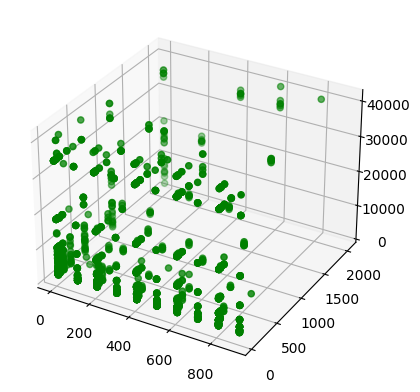

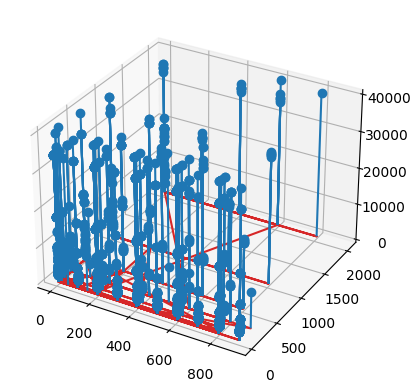

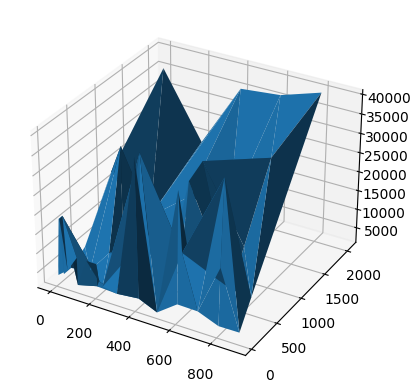

In [16]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(xdata[:,0], xdata[:,3], ydata, color = "green")


fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.stem(xdata[:,0], xdata[:,3], ydata)


ax = plt.figure().add_subplot(projection='3d')

ax.plot_trisurf(xdata[:,0], xdata[:,3], ydata, linewidth=0.2, antialiased=True)

plt.show()

In [21]:
# conv_layers  params_total  activations  batch_size

p0 = 1., 1., 1.
popt, pcov = curve_fit(func, (xdata[:,0], xdata[:,1], xdata[:,2], xdata[:,3]), ydata, p0)

print(popt)

[6.2542432e-06 5.5859116e-08 1.0000000e+00]


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


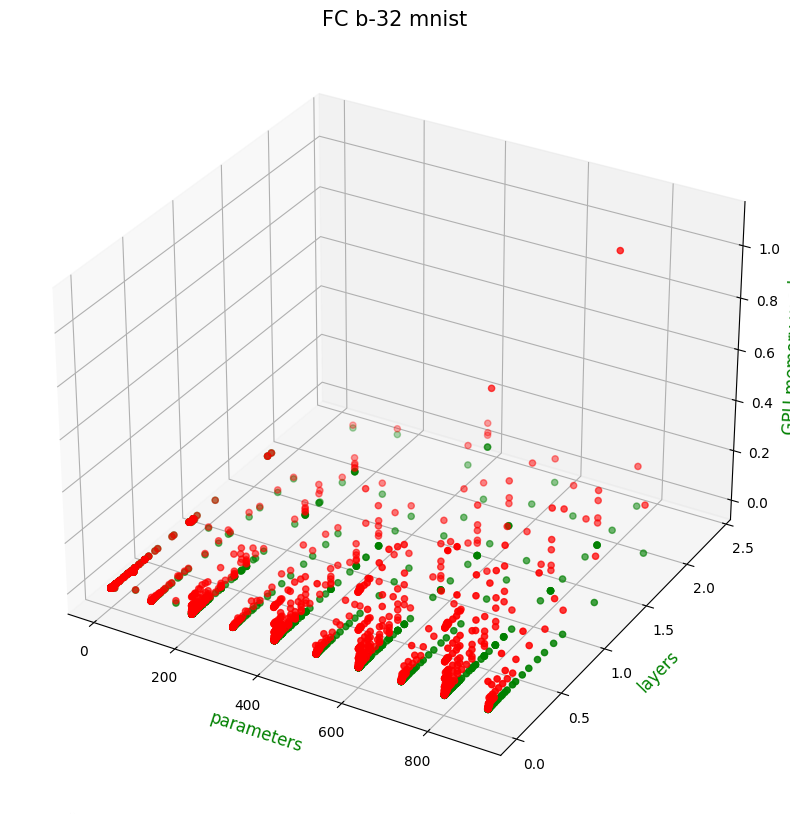

[39821  9791  3641 ... 18057 39617 34569]
[2.64561341e+07 3.29267412e+06 1.33556833e+05 ... 3.98143617e+04
 2.00618341e+04 8.05155996e+04]


In [22]:

# plotting the data points and the fitted curve
fig = plt.figure()
fig.set_figwidth(40)
fig.set_figheight(10)
ax = plt.axes(projection='3d')
ax.set_title('FC b-32 mnist', fontsize=15)
ax.set_xlabel('parameters', fontsize=12, color='green')
ax.set_ylabel('layers', fontsize=12, color='green')
ax.set_zlabel('GPU memory used', fontsize=12, color='green')
ax.scatter3D(xdata[:,0], xdata[:,1], ydata, color='green')

# popt[0]: a
# popt[1]: b
# popt[2]: c
# (a * batch_size * activations + b * batch_size * parameters)/ c * layers

predictions = (popt[0] * xdata[:,3] * xdata[:,2] + popt[1] * xdata[:,3] * xdata[:,1])/ popt[2] * xdata[:,0]

ax.scatter(xdata[:,0], xdata[:,1], predictions, color='red')
plt.show()

print(ydata)
print(predictions)

In [7]:
from sklearn.linear_model import RANSACRegressor

reg = RANSACRegressor(random_state=0).fit(xdata, ydata)

reg.score(xdata, ydata)

0.7036134355785695

In [9]:
reg.predict([[74, 22910480, 33517585, 128, 225]])

array([10401.80860467])